<a href="https://colab.research.google.com/github/Yasirkhan26/CS-351L---AI-Lab-GitHub-Repository_2022455/blob/main/M_Yasir_CS351L_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB TASK 4**

Load Dataset: The Titanic dataset is loaded from a URL and displayed to examine the first few rows.

Visualize Missing Values: A heatmap is created to identify any missing data in the dataset.

Handle Missing Values:

Fill missing Age values with the median age.
Drop the Cabin column due to excessive missing data.
Fill missing Embarked values with the mode.
Encode Categorical Variables: Convert Sex and Embarked to numerical values for model compatibility.

Prepare Data: Relevant features (Pclass, Sex, Age, Fare, Embarked) are selected, and the target label (Survived) is specified.

Split Data: The dataset is divided into training (70%) and testing (30%) sets.

Train Models:

Train a k-Nearest Neighbors (k-NN) model with k=3.
Train a Decision Tree model.
Make Predictions: Both models predict survival on the test set.

Evaluate Models:

Generate classification reports for both models, detailing precision, recall, and F1-score.
Visualize confusion matrices for each model using heatmaps for clarity.


First few rows of the Titanic dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

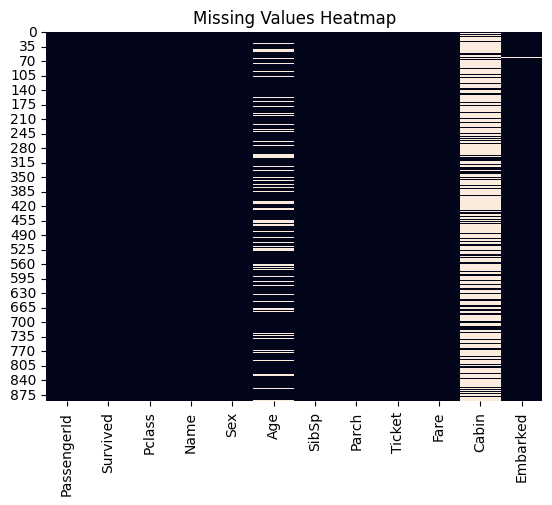

k-NN Model Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       157
           1       0.70      0.47      0.56       111

    accuracy                           0.70       268
   macro avg       0.70      0.66      0.67       268
weighted avg       0.70      0.70      0.68       268

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.72      0.71      0.71       111

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.76      0.76      0.76       268



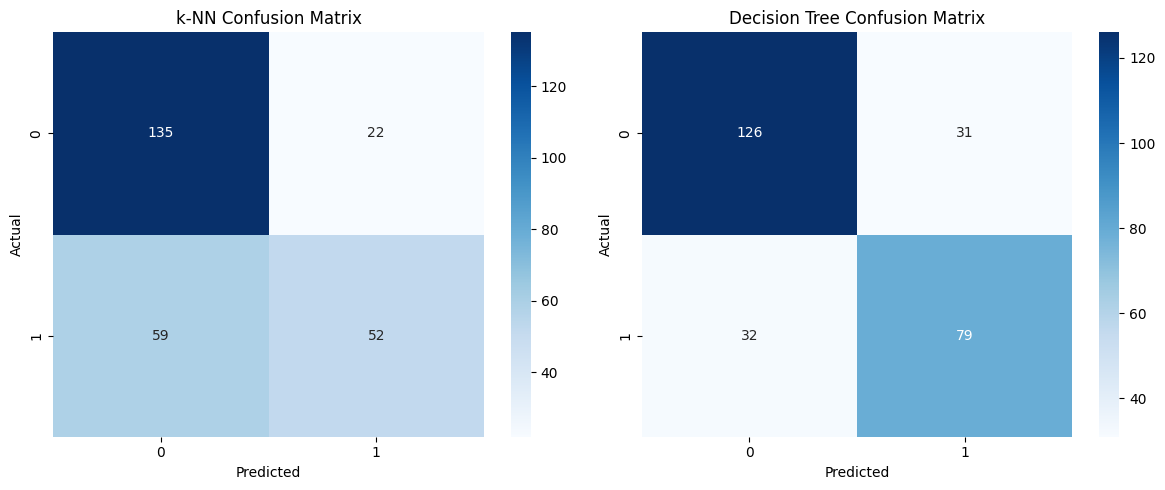

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the Titanic dataset:")
print(titanic_data.head())

# Visualize missing values
sns.heatmap(titanic_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})  # Male: 1, Female: 0
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # C: 0, Q: 1, S: 2

# Prepare features and labels
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Implementing Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  # Train the Decision Tree model on the training data

# Making predictions on the test set for both models
knn_predictions = knn.predict(X_test)
tree_predictions = decision_tree.predict(X_test)

# Evaluate the k-NN model's performance
print("k-NN Model Evaluation:")
print(classification_report(y_test, knn_predictions))

# Evaluate the Decision Tree model's performance
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, tree_predictions))

# Visualizing the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, tree_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
